In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Trees.Tree import Tree
from metrics import mse, accuracy
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
dataset = sns.load_dataset("penguins")
dataset = dataset[dataset['body_mass_g'] != np.nan]
dataset = dataset.drop(['island', 'sex'], axis=1)
dataset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [3]:
train, test = train_test_split(dataset, train_size=0.6, shuffle=True, random_state=42)
# test = test.drop('species', axis=1)
model = Tree(metric=accuracy, split_type='entropy', max_depth=3)
model.fit(train, target='species')
model.predict(test, predict_col='pred')

Adelie       88
Gentoo       74
Chinstrap    44
Name: species, dtype: int64
find threshold in: 32.6 58.8
feature: bill_length_mm classes {'left': 'Adelie', 'right': 'Gentoo'} split_predict 0.7475728155339806 

find threshold in: 13.350000000000001 21.2
feature: bill_depth_mm classes {'left': 'Gentoo', 'right': 'Adelie'} split_predict 0.7475728155339806 

find threshold in: 173.0 230.0
feature: flipper_length_mm classes {'left': 'Adelie', 'right': 'Gentoo'} split_predict 0.7766990291262136 

find threshold in: 2775.0 6175.0
feature: body_mass_g classes {'left': 'Adelie', 'right': 'Gentoo'} split_predict 0.7475728155339806 

{'best_score': 0.7766990291262136, 'best_feature': 'flipper_length_mm', 'best_threshold': 206.5, 'left_class': 'Adelie', 'right_class': 'Gentoo'} 
------------------------------ 

Adelie       86
Chinstrap    39
Name: species, dtype: int64
find threshold in: 32.6 55.75
feature: bill_length_mm classes {'left': 'Adelie', 'right': 'Chinstrap'} split_predict 0.96 

find 

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,pred
194,Chinstrap,50.9,19.1,196.0,3550.0,Chinstrap
157,Chinstrap,45.2,17.8,198.0,3950.0,Chinstrap
225,Gentoo,46.5,13.5,210.0,4550.0,Gentoo
208,Chinstrap,45.2,16.6,191.0,3250.0,Chinstrap
318,Gentoo,48.4,14.4,203.0,4625.0,Chinstrap
...,...,...,...,...,...,...
223,Gentoo,50.0,15.2,218.0,5700.0,Gentoo
181,Chinstrap,52.8,20.0,205.0,4550.0,Chinstrap
92,Adelie,34.0,17.1,185.0,3400.0,Adelie
69,Adelie,41.8,19.4,198.0,4450.0,Adelie


In [4]:
accuracy(test['pred'], test['species'])

0.9492753623188406

In [5]:
from sklearn import datasets
blobs = datasets.make_blobs(n_samples=1234, random_state=42, centers=5, cluster_std=2)

In [6]:
df_train = pd.DataFrame(blobs[0], columns=['x1', 'x2'])
df_train['target'] = blobs[1]

df_test = pd.DataFrame()
df_test['x1'] = np.random.uniform(-10, 10, 1000)
df_test['x2'] = np.random.uniform(-10, 10, 1000)

<AxesSubplot:xlabel='x1', ylabel='x2'>

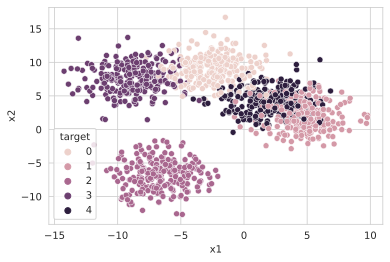

In [7]:
sns.scatterplot(data=df_train, x='x1', y='x2', hue='target')

2    247
1    247
0    247
3    247
4    246
Name: target, dtype: int64
find threshold in: -14.071847572381579 9.773323177746757
feature: x1 classes {'left': 2, 'right': 1} split_predict 0.40032414910858993 

find threshold in: -12.624907592099712 15.587186785442661
feature: x2 classes {'left': 2, 'right': 0} split_predict 0.40032414910858993 

{'best_score': 0.40032414910858993, 'best_feature': 'x1', 'best_threshold': -1.7704651149512247, 'left_class': 2, 'right_class': 1} 
------------------------------ 

2    247
3    247
0    171
4      7
Name: target, dtype: int64
find threshold in: -14.071847572381579 -1.7809633519082677
feature: x1 classes {'left': 3, 'right': 0} split_predict 0.5877976190476191 

find threshold in: -12.624907592099712 14.197697407273226
feature: x2 classes {'left': 2, 'right': 3} split_predict 0.7351190476190477 

{'best_score': 0.7351190476190477, 'best_feature': 'x2', 'best_threshold': -0.11699885937250709, 'left_class': 2, 'right_class': 3} 
----------------

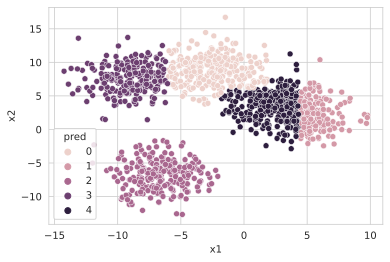

In [8]:
model = Tree(metric=accuracy, split_type='entropy', max_depth=3)
model.fit(df_train, target='target')
predict_df = model.predict(df_train, predict_col='pred')
ax = sns.scatterplot(data=predict_df, x='x1', y='x2', hue='pred')
# ax.set(xlim = (-12, 7), ylim=(-10, 10))
plt.show()

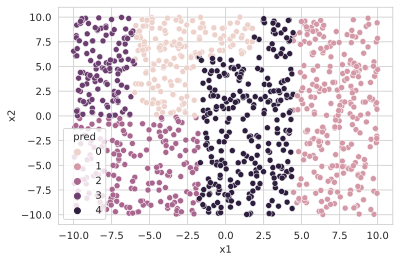

In [9]:
predict_df = model.predict(df_test, predict_col='pred')
ax = sns.scatterplot(data=predict_df, x='x1', y='x2', hue='pred')


In [4]:
from Trees.RandomForest import RandomForest

dataset = sns.load_dataset("penguins")
dataset = dataset[dataset['body_mass_g'] != np.nan]
dataset = dataset.drop(['island', 'sex'], axis=1)
train, test = train_test_split(dataset, train_size=0.6, shuffle=True, random_state=42)
train

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
96,Adelie,38.1,18.6,190.0,3700.0
262,Gentoo,45.3,13.7,210.0,4300.0
97,Adelie,40.3,18.5,196.0,4350.0
182,Chinstrap,40.9,16.6,187.0,3200.0
68,Adelie,35.9,16.6,190.0,3050.0
...,...,...,...,...,...
188,Chinstrap,47.6,18.3,195.0,3850.0
71,Adelie,39.7,18.4,190.0,3900.0
106,Adelie,38.6,17.2,199.0,3750.0
270,Gentoo,46.6,14.2,210.0,4850.0


In [8]:

model = RandomForest(n_estimators=50, criterion='entropy', max_depth=4, max_features=2, random_state=42, n_jobs=-1)
model.fit(train, 'species')

['body_mass_g', 'flipper_length_mm']
Adelie       88
Gentoo       74
Chinstrap    44
Name: species, dtype: int64
find threshold in: 2775.0 6175.0
feature: body_mass_g classes {'left': 'Adelie', 'right': 'Gentoo'} split_predict 0.7475728155339806 

find threshold in: 173.0 230.0
feature: flipper_length_mm classes {'left': 'Adelie', 'right': 'Gentoo'} split_predict 0.7766990291262136 

{'best_score': 0.7766990291262136, 'best_feature': 'flipper_length_mm', 'best_threshold': 206.5, 'left_class': 'Adelie', 'right_class': 'Gentoo'} 
------------------------------ 

Adelie       86
Chinstrap    39
Name: species, dtype: int64
find threshold in: 2775.0 4487.5
feature: body_mass_g classes {'left': 'Adelie', 'right': 'Adelie'} split_predict 0.688 

find threshold in: 173.0 205.5
feature: flipper_length_mm classes {'left': 'Adelie', 'right': 'Chinstrap'} split_predict 0.696 

{'best_score': 0.696, 'best_feature': 'flipper_length_mm', 'best_threshold': 192.0, 'left_class': 'Adelie', 'right_class':

In [9]:
pred = model.predict(test, None)

In [10]:
accuracy(pred, test['species'])

0.9565217391304348